# $\color{ForestGreen}{\text{Neural Networks with Keras TensorFlow}}$

Objective: Choose different normalization mechanisms and different activation functions and try to understand their importance!


In [ ]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Importing basic tensorflow modules 
from tensorflow.keras.layers import Dense, Activation 
from tensorflow.keras.models import Model, Sequential 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model 

## $\color{ForestGreen}{\text{Differential Reflectance Dataset}}$

In [ ]:
X_train = pd.read_csv('https://raw.githubusercontent.com/simsekergun/MLPdatasets/main/DifferentialReflectance/Reflectance_X_train.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/simsekergun/MLPdatasets/main/DifferentialReflectance/Reflectance_Y_train.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/simsekergun/MLPdatasets/main/DifferentialReflectance/Reflectance_X_test.csv')
X_train.shape, y_train.shape

((3060, 244), (3060, 2))

In [ ]:
Xmins = X_train.min()
Xmaxs = X_train.max()
ymins = y_train.min()
ymaxs = y_train.max()

In [ ]:
X = (X_train-Xmins)/Xmaxs
y = (y_train-ymins)/ymaxs

In [ ]:
# Creating a simple function that builds a fully connected neural network  
def create_model(n_neurons, learning_rate): 
    model = Sequential() 
    model.add(Dense(n_neurons, input_dim=X_train.shape[1], activation='sigmoid')) # Layer 1 + activation
    model.add(Dense(n_neurons, activation='sigmoid'))                             # Layer 2 + activation
    model.add(Dense(n_neurons, activation='sigmoid'))                             # Layer 3 + activation
    model.add(Dense(y_train.shape[1]))                                          # Output layer
    adam = Adam(learning_rate=learning_rate)                                      # Choice of optimizer
    # Compiling the model by specifying the choice of loss function ('mse'), and performance metrics
    model.compile(loss='mse', optimizer=adam, metrics=['mse']) 
    return model

In [ ]:
# Creating a model with 128 neurons and learning rate 0.001

#del model
model = create_model(n_neurons=128, learning_rate=0.001)

In [ ]:
# Presenting the summary of the model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               31360     
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 64,642
Trainable params: 64,642
Non-trainable params: 0
_________________________________________________________________


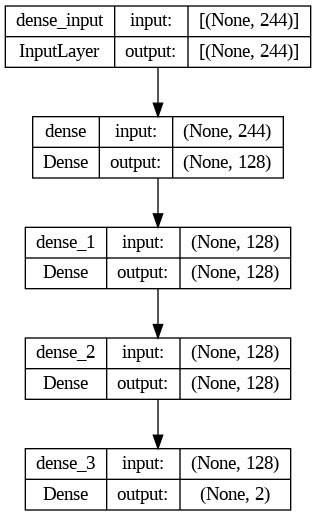

In [ ]:
# Visualize the model's structure 
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Training the model for 100 epochs
epochs = 50

model_history = model.fit(X_train, y_train, epochs=epochs,verbose=0)

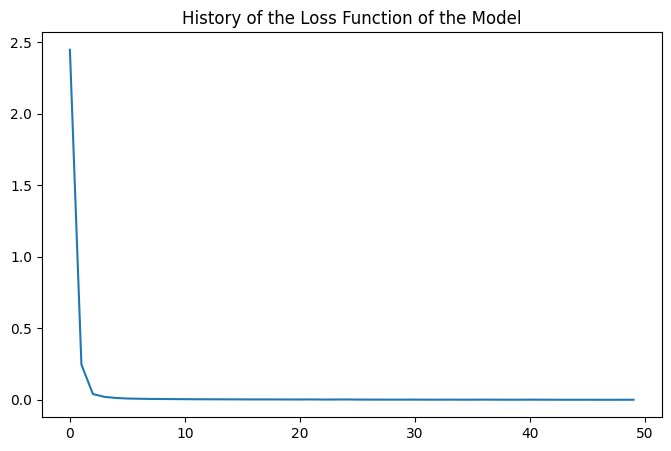

In [ ]:
# Plotting the loss function from model's history

plt.figure(figsize=(8,5))
plt.plot(model_history.history['mse'], label = 'train mse')
plt.title('History of the Loss Function of the Model')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 103ms/step


array([[2.53369  , 3.7669811]], dtype=float32)

The true answer is n = 2.5 and k = 3.74

n prediction Error = 1.3%

k prediction Error = 0.7%